In [ ]:
!pip install datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import joblib
import os
import sys
import time
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# prompt: load minst

from datasets import load_dataset

dataset = load_dataset("mnist")


In [ ]:
# prompt: split  it to target  and X

X = dataset['train']['image']
y = dataset['train']['label']


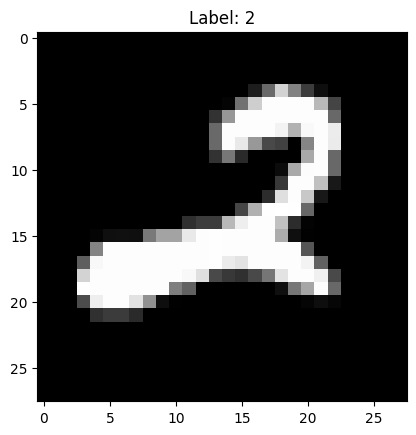

In [ ]:
# prompt: plot random img

import random
import matplotlib.pyplot as plt

# Select a random index
random_index = random.randint(0, len(X) - 1)

# Get the image and label
image = X[random_index]
label = y[random_index]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.show()


In [ ]:
# prompt: make new df contain data ready to train in ml model

# Convert the images to a NumPy array
X = np.array(dataset['train']['image'])
y = np.array(dataset['train']['label'])

# Reshape the images to a 2D array
X = X.reshape(X.shape[0], -1)

# Create a DataFrame
df = pd.DataFrame(X)
df['label'] = y

# Display the DataFrame
print(df.head())


   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]


In [ ]:
# prompt: make rf model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.96925


In [ ]:
# prompt: import minst and apply cnn on it

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from datasets import load_dataset

# Load the MNIST dataset
dataset = load_dataset("mnist")

# Preprocess the data
X_train = np.array(dataset['train']['image'])
y_train = np.array(dataset['train']['label'])
X_test = np.array(dataset['test']['image'])
y_test = np.array(dataset['test']['label'])

# Reshape the images to (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize the pixel values
X_train /= 255
X_test /= 255

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

##Data Augmentation


In [ ]:


# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy}")


Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1506 - accuracy: 0.9548 - val_loss: 0.0444 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0402 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0337 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0353 - val_accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0352 - val_accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0382 - val_ac